In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
veri = pd.read_csv("veri_setleri/egitim.csv",sep=",")
print(f"veri boyutu={veri.shape}")#28*28 lik bir kopyası resimlerin
veri.head(3)

veri boyutu=(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
veri = veri[(veri["label"]==1)|(veri["label"]==0)]
print(veri.shape)
veri.head(3)

(8816, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_veri=veri["label"]
X_veri=veri.drop(["label"],axis=1)
print(f"X_veri{X_veri.shape}")
print(f"y_veri{y_veri.shape}")

X_veri(8816, 784)
y_veri(8816,)


In [46]:
resim_boyutu=int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

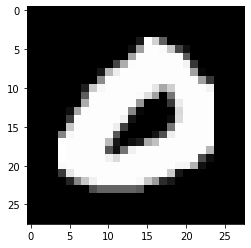

In [47]:
resim1 = X_veri.iloc[1001].values
resim1 = resim1.reshape((resim_boyutu,resim_boyutu))
plt.imshow(resim1,cmap="gray")
plt.show()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X_veri,y_veri,test_size=0.15,random_state=22)

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # yapay sinir ağı kütüphanesi ilklendirme
from keras.layers import Dense # katmanlar için
import warnings
warnings.filterwarnings("ignore")


In [54]:
def SiniflandiriciMethod():
    siniflandirici = Sequential()
    siniflandirici.add(Dense(units=8,kernel_initializer="uniform",activation="relu",input_dim=x_train.shape[1]))
    siniflandirici.add(Dense(units=4,kernel_initializer="uniform",activation="relu"))
    siniflandirici.add(Dense(units=1,kernel_initializer="unifrom",activation="sigmoid"))
    siniflandirici.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return siniflandirici

In [57]:
ysa = KerasClassifier(build_fn=SiniflandiriciMethod,epochs=2) 
dogruluk = cross_val_score(estimator=ysa,X=x_train,y=y_train,cv=3)
ortalama =dogruluk.mean()
std_s=dogruluk.std()
print(f"Doğruluk ortalama={ortalama}")
print(f"Standart sapma ortalama={std_s}")

Doğruluk ortalama=nan
Standart sapma ortalama=nan
